In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

# import third-party library
sys.path.append('./my_lib/')
from data_augmentation import DataAugmentation

c:\users\luca\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import data
csv_train = pd.read_csv('../input/labels.csv')
csv_test = pd.read_csv('../input/sample_submission.csv')

In [3]:
# read training CSV
csv_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [4]:
# read test csv
csv_test.head(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
5,00225dcd3e4d2410dd53239f95c0352f,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
6,002c2a3117c2193b4d26400ce431eebd,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
7,002c58d413a521ae8d1a5daeb35fc803,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
8,002f80396f1e3db687c5932d7978b196,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
9,0036c6bcec6031be9e62a257b1c3c442,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [5]:
# Generate Labels
targets_series = pd.Series(csv_train['breed'])
# print(targets_series)
one_hot = pd.get_dummies(targets_series, sparse = True)
labels = np.asarray(one_hot)
n_check = random.randint(0, len(labels)-1)
print(csv_train['breed'][n_check], 'is encoded as', ''.join((str(i) for i in labels[n_check])))

scottish_deerhound is encoded as 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000


In [6]:
im_size = 90

x_train = []
y_train = []
x_test = []

In [7]:
for i, (f, breed) in enumerate(tqdm(csv_train.values)):
    img = cv2.imread('../input/train/{}.jpg'.format(f))
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(labels[i])

100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [00:28<00:00, 360.30it/s]


label: 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000


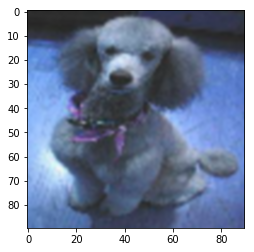

In [8]:
# check train
n_check = random.randint(0, len(y_train)-1)
print('label:', ''.join((str(i) for i in y_train[n_check])))
plt.imshow(x_train[n_check], cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [9]:
for f in tqdm(csv_test['id'].values):
    img = cv2.imread('../input/test/{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|███████████████████████████████████████████████████████████████████████████| 10357/10357 [00:30<00:00, 343.61it/s]


In [10]:
# build np array and normalise them
x_train_raw = np.array(x_train, np.float32) / 255.
y_train_raw = np.array(y_train, np.uint8)
x_test_raw  = np.array(x_test, np.float32) / 255.

In [11]:
print("x_train shape:", x_train_raw.shape)
print("y_train shape:", y_train_raw.shape)
print("x_test shape:", x_test_raw.shape)

x_train shape: (10222, 90, 90, 3)
y_train shape: (10222, 120)
x_test shape: (10357, 90, 90, 3)


In [12]:
num_class = y_train_raw.shape[1]

Using the __stratify__ parameter on __treain_test_split__ the split should be equally distributed per classes.

In [13]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw,
                                                      test_size=0.3, random_state=42,
                                                      stratify=y_train_raw)

In [14]:
# Create the base pre-trained model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(im_size, im_size, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_class, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint('../output/weights-main.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto', period=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 90, 90, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 90, 90, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 90, 90, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 45, 45, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 45, 45, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 45, 45, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 22, 128)       0         
__________

In [15]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=48,
                    validation_data=(X_valid, Y_valid),
                    callbacks=callbacks_list, verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/20
7155/7155 [==============================] - 15s 2ms/step - loss: 4.5231 - acc: 0.0569 - val_loss: 4.1449 - val_acc: 0.0998
Epoch 2/20
7155/7155 [==============================] - 13s 2ms/step - loss: 3.4836 - acc: 0.2330 - val_loss: 3.9565 - val_acc: 0.1190
Epoch 3/20
7155/7155 [==============================] - 13s 2ms/step - loss: 2.9689 - acc: 0.3428 - val_loss: 3.9029 - val_acc: 0.1275
Epoch 4/20
7155/7155 [==============================] - 13s 2ms/step - loss: 2.6062 - acc: 0.4252 - val_loss: 3.8087 - val_acc: 0.1510
Epoch 5/20
7155/7155 [==============================] - 13s 2ms/step - loss: 2.3066 - acc: 0.5131 - val_loss: 3.8155 - val_acc: 0.1545
Epoch 6/20
7155/7155 [==============================] - 13s 2ms/step - loss: 2.0700 - acc: 0.5679 - val_loss: 3.7956 - val_acc: 0.1627
Epoch 7/20
7155/7155 [==============================] - 13s 2ms/step - loss: 1.8583 - acc: 0.6275 - val_loss: 3.8004 - val_acc: 0.1552
Epoch 8

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


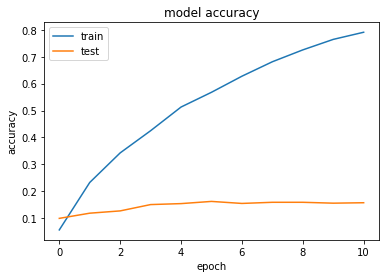

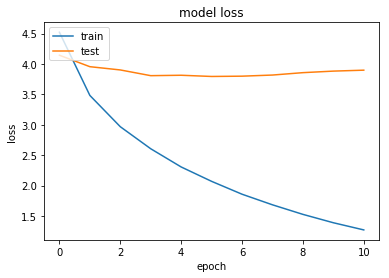

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
preds = model.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - 14s 1ms/step


In [37]:
# save prediction to csv
frame = pd.DataFrame(preds, index=csv_test['id'].tolist(), columns=labels)
frame.to_csv("../output/predicted-main.csv", index_label='id') 

In [36]:
frame.head(10)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,2.425498e-05,2.286506e-02,2.519486e-07,6.821161e-05,0.003094,3.940067e-05,2.742385e-05,0.000093,3.038759e-02,1.016812e-01,...,0.000057,2.556599e-05,5.494218e-05,1.051576e-02,1.855002e-03,2.233713e-01,0.000005,7.307528e-03,0.000184,0.000075
00102ee9d8eb90812350685311fe5890,2.653442e-06,3.403023e-07,1.175413e-06,5.178038e-06,0.000011,3.084692e-05,8.371494e-07,0.000012,9.025362e-08,3.108765e-06,...,0.000007,1.958530e-04,2.039234e-07,2.003416e-06,1.127023e-06,9.175521e-06,0.018507,9.046760e-06,0.000130,0.000002
0012a730dfa437f5f3613fb75efcd4ce,4.723423e-02,1.197608e-02,8.623925e-04,1.127438e-02,0.002077,6.777032e-03,1.443636e-03,0.002702,1.003438e-03,5.789709e-03,...,0.000408,1.497462e-03,9.733699e-04,1.396634e-02,3.425966e-03,2.689513e-03,0.003977,1.240358e-02,0.007336,0.002097
001510bc8570bbeee98c8d80c8a95ec1,2.466603e-04,1.218823e-02,6.891149e-03,2.754005e-02,0.003609,1.609308e-02,3.601247e-03,0.051080,1.128975e-03,2.157720e-04,...,0.000607,1.490249e-03,1.052482e-03,6.687145e-04,6.440607e-04,1.234358e-04,0.000254,1.684626e-02,0.000466,0.000855
001a5f3114548acdefa3d4da05474c2e,1.738742e-02,2.912133e-02,1.245633e-03,3.724030e-03,0.002102,1.742288e-03,2.434752e-03,0.000195,1.582692e-03,1.115119e-04,...,0.001993,2.772412e-05,1.251645e-04,1.964932e-04,1.350785e-03,7.246494e-05,0.000716,2.556671e-04,0.006082,0.000933
00225dcd3e4d2410dd53239f95c0352f,1.222592e-06,1.516051e-02,9.460046e-06,1.070589e-02,0.000405,8.129131e-05,2.499674e-03,0.006226,3.207226e-04,3.880150e-05,...,0.087158,1.163988e-07,2.104335e-03,4.182601e-04,1.570298e-04,7.671149e-04,0.000022,1.179623e-04,0.019249,0.000266
002c2a3117c2193b4d26400ce431eebd,1.040698e-01,6.493921e-03,1.873689e-03,1.150012e-03,0.000393,9.511342e-03,7.181135e-02,0.005860,4.652418e-04,6.489077e-04,...,0.000097,1.129053e-02,1.429763e-04,4.478475e-05,3.588153e-04,1.492326e-03,0.007705,1.588514e-03,0.000289,0.008314
002c58d413a521ae8d1a5daeb35fc803,3.208643e-10,2.279620e-07,5.495552e-11,2.806281e-07,0.000004,1.927138e-07,5.915879e-05,0.000018,1.269546e-10,1.295446e-08,...,0.000001,5.625662e-07,4.834723e-12,1.268525e-08,2.459609e-12,5.186310e-07,0.132968,6.915865e-08,0.000291,0.000896
002f80396f1e3db687c5932d7978b196,2.163950e-04,5.523653e-04,5.528105e-02,9.506781e-03,0.005973,1.767084e-03,8.997634e-03,0.002132,4.662337e-04,1.699262e-04,...,0.000447,2.932116e-04,7.603629e-05,2.768816e-04,1.620514e-03,1.606290e-04,0.001936,4.188514e-03,0.000145,0.000995
0036c6bcec6031be9e62a257b1c3c442,5.550417e-05,5.218619e-03,7.334647e-05,1.045344e-02,0.001164,2.584496e-04,1.957737e-04,0.000005,7.194165e-04,1.197332e-03,...,0.001171,1.624289e-06,7.024895e-03,9.799065e-05,1.395661e-02,8.494314e-05,0.000031,1.920480e-04,0.003525,0.000834


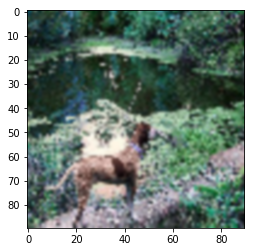

0.15907839 37 dingo


In [20]:
# check predict
labels = csv_test.columns.values[1:]
n_check = random.randint(0, len(x_test_raw)-1)
plt.imshow(x_test_raw[n_check], cmap = 'gray_r', interpolation = 'bicubic')
plt.show()
pre = model.predict(np.array([x_test_raw[n_check]]))
arg_max = np.argmax(pre)
print(np.max(pre), arg_max, labels[arg_max])